# <font color='red'>**Sequence to sequence implementation**</font>

## Task -1: Simple Encoder and Decoder
Implement simple Encoder-Decoder model

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from bs4 import BeautifulSoup

Using TensorFlow backend.


In [ ]:
np.__version__

'1.19.2'

<font color='blue'>**Load the data**</font>

In [ ]:
with open('ita.txt','r', encoding="utf8") as f:
    eng=[]
    ita=[]
    for line in f:
        eng.append(line.split('\t')[0])
        ita.append(line.split('\t')[1])
df = pd.DataFrame(data=list(zip(eng,ita)),columns=["English","Italian"])
df.head()
df.shape

(353281, 2)

<font color='blue'>**Preprocess data**</font>

In [ ]:
from bs4 import BeautifulSoup
def remove_tags(html):
      soup = BeautifulSoup(html, "html.parser")
    for data in soup(['style', 'script']):
        data.decompose()
      return ' '.join(soup.stripped_strings)

def text_pp_eng(text):
    txt = remove_tags(text)
    
    tokens = txt.split()
    
    for i,tok in enumerate(tokens):
        tokens[i] = re.sub(r'[^http?\:\/\/\S*]','',tok)
        tokens[i] = re.sub(r'[^https?\:\/\/\S*]','',tokens[i])
        tokens[i] = re.sub(r'u200b', ' ', tokens[i])
        tokens[i] = re.sub(r'u200', ' ', tokens[i])
        tokens[i] = re.sub(r'xa0', ' ', tokens[i])
        
        tokens[i] = re.sub(r"won\'t", "will not", tokens[i])
        tokens[i] = re.sub(r"can\'t", "can not", tokens[i])
        tokens[i] = re.sub(r"won\’t", "will not", tokens[i])
        tokens[i] = re.sub(r"can\’t", "can not", tokens[i])
        tokens[i] = re.sub(r"ain\’t", "is not", tokens[i])
        tokens[i] = re.sub(r"\’tis", "is", tokens[i])
        tokens[i] = re.sub(r"y\’all", "you all", tokens[i])
        tokens[i] = re.sub(r"n\'t", " not", tokens[i])
        tokens[i] = re.sub(r"\'re", " are", tokens[i])
        tokens[i] = re.sub(r"\'s", " is", tokens[i])
        tokens[i] = re.sub(r"\'d", " would", tokens[i])
        tokens[i] = re.sub(r"\'ll", " will", tokens[i])
        tokens[i] = re.sub(r"\'t", " not", tokens[i])
        tokens[i] = re.sub(r"\'ve", " have", tokens[i])
        tokens[i] = re.sub(r"\'m", " am", tokens[i])
        tokens[i] = re.sub(r"n\’t", " not", tokens[i])
        tokens[i] = re.sub(r"\’re", " are", tokens[i])
        tokens[i] = re.sub(r"\’s", " is", tokens[i])
        tokens[i] = re.sub(r"\’d", " would", tokens[i])
        tokens[i] = re.sub(r"\’ll", " will", tokens[i])
        tokens[i] = re.sub(r"\’t", " not", tokens[i])
        tokens[i] = re.sub(r"\’ve", " have", tokens[i])
        tokens[i] = re.sub(r"\’m", " am", tokens[i])
        
        tokens[i] = re.sub(r'^()$', ' ', tokens[i])
        tokens[i] = re.sub(r'^\[\]$', ' ', tokens[i])
        tokens[i] = re.sub(r'^<>$', ' ', tokens[i])
        tokens[i] = re.sub(r'^{}$', ' ', tokens[i])
        
        tokens[i] = re.sub('[^A-Za-z0-9\s]','',tokens[i])
            
    tokens = [tok for tok in tokens if tok != '']
    
    for i,tok in enumerate(tokens):
        tokens[i] = tok.lower()
    
    pptxt = ' '.join(tokens)
    
    return pptxt


def text_pp_ita(text):
    txt = remove_tags(text)    
    tokens = txt.split()
    for i,tok in enumerate(tokens):
        tokens[i] = re.sub(r'http?\:\/\/\S*','',tok)
        tokens[i] = re.sub(r'https?\:\/\/\S*','',tokens[i])
        tokens[i] = re.sub(r'u200b', ' ', tokens[i])
        tokens[i] = re.sub(r'u200', ' ', tokens[i])
        tokens[i] = re.sub(r'xa0', ' ', tokens[i])
        
        tokens[i] = re.sub(r'^()$', ' ', tokens[i])
        tokens[i] = re.sub(r'^\[\]$', ' ', tokens[i])
        tokens[i] = re.sub(r'^<>$', ' ', tokens[i])
        tokens[i] = re.sub(r'^{}$', ' ', tokens[i])
        
        tokens[i] = re.sub('[#$)\?"’.°!;\'\]\[€%:,&@>\-<=+(/_]','',tokens[i])
            
    tokens = [tok for tok in tokens if tok != '']
    
    for i,tok in enumerate(tokens):
        tokens[i] = tok.lower()
    pptxt = ' '.join(tokens)
    return pptxt

In [ ]:
import time
strt = time.time()
df["English"] = df["English"].apply(text_pp_eng)
df["Italian"] = df["Italian"].apply(text_pp_ita)
end = time.time()
print("Runtime",end-strt,"seconds")

Runtime 98.83728337287903 seconds


*CHECK FREQUENCY OF SENTENCES WITH RESPECT TO LENGTH OF SENTENCES*

In [ ]:
ita_len = df['Italian'].str.split().apply(len)
eng_len = df['English'].str.split().apply(len)

In [ ]:
for i in range(90,101):
    print('{}th percentile of italian sentence length'.format(i),np.percentile(ita_len,i))

90th percentile of italian sentence length 8.0
91th percentile of italian sentence length 8.0
92th percentile of italian sentence length 8.0
93th percentile of italian sentence length 9.0
94th percentile of italian sentence length 9.0
95th percentile of italian sentence length 9.0
96th percentile of italian sentence length 9.0
97th percentile of italian sentence length 10.0
98th percentile of italian sentence length 11.0
99th percentile of italian sentence length 12.0
100th percentile of italian sentence length 92.0


In [ ]:
for i in np.arange(99,100,0.1):
    print('{}th percentile of italian sentence length'.format(i),np.percentile(ita_len,i))
print('{}th percentile of italian sentence length'.format(99.99),np.percentile(ita_len,99.99))
print('{}th percentile of italian sentence length'.format(100),np.percentile(ita_len,100))

99.0th percentile of italian sentence length 12.0
99.1th percentile of italian sentence length 12.0
99.19999999999999th percentile of italian sentence length 12.0
99.29999999999998th percentile of italian sentence length 13.0
99.39999999999998th percentile of italian sentence length 13.0
99.49999999999997th percentile of italian sentence length 13.0
99.59999999999997th percentile of italian sentence length 14.0
99.69999999999996th percentile of italian sentence length 15.0
99.79999999999995th percentile of italian sentence length 16.0
99.89999999999995th percentile of italian sentence length 22.0
99.99th percentile of italian sentence length 44.0
100th percentile of italian sentence length 92.0


**For italian text 99.89% of the texts are having length < 22**

In [ ]:
for i in range(90,101):
    print('{}th percentile of english sentence length'.format(i),np.percentile(eng_len,i))

90th percentile of english sentence length 8.0
91th percentile of english sentence length 9.0
92th percentile of english sentence length 9.0
93th percentile of english sentence length 9.0
94th percentile of english sentence length 9.0
95th percentile of english sentence length 9.0
96th percentile of english sentence length 10.0
97th percentile of english sentence length 10.0
98th percentile of english sentence length 11.0
99th percentile of english sentence length 12.0
100th percentile of english sentence length 101.0


In [ ]:
for i in np.arange(99,100,0.1):
    print('{}th percentile of english sentence length'.format(i),np.percentile(eng_len,i))
print('{}th percentile of english sentence length'.format(99.99),np.percentile(eng_len,99.99))
print('{}th percentile of english sentence length'.format(100),np.percentile(eng_len,100))

99.0th percentile of english sentence length 12.0
99.1th percentile of english sentence length 12.0
99.19999999999999th percentile of english sentence length 13.0
99.29999999999998th percentile of english sentence length 13.0
99.39999999999998th percentile of english sentence length 13.0
99.49999999999997th percentile of english sentence length 14.0
99.59999999999997th percentile of english sentence length 14.0
99.69999999999996th percentile of english sentence length 15.0
99.79999999999995th percentile of english sentence length 16.0
99.89999999999995th percentile of english sentence length 25.0
99.99th percentile of english sentence length 41.0
100th percentile of english sentence length 101.0


**For english text 99.89% of the texts are having length < 24**

**So we will select texts of length < 24 for training our model**

*TEACHER FORCING*

In [ ]:
df["eng_len"] = eng_len
df["ita_len"] = ita_len
df = df[df["eng_len"]<24]
df = df[df["ita_len"]<24]
df["eng_inp"] = '<sos> ' + df["English"]
df["eng_out"] = df["English"] + ' <eos>'
df.drop(['eng_len','ita_len','English'],axis=1,inplace=True)
df.head()

,Italian,eng_inp,eng_out
0,ciao,<sos> hi,hi <eos>
1,ciao,<sos> hi,hi <eos>
2,corri,<sos> run,run <eos>
3,corra,<sos> run,run <eos>
4,correte,<sos> run,run <eos>


In [ ]:
df.shape

(352885, 3)

In [ ]:
df.to_csv("df_preprocessed",index=False)

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xval = train_test_split(df, test_size=0.2)
print(xtr.shape, xval.shape)
xtr.iloc[0]['eng_inp']= str(xtr.iloc[0]['eng_inp'])+' <eos>'
xtr.iloc[0]['eng_out']= str(xtr.iloc[0]['eng_out'])+' <eos>'

(282308, 3) (70577, 3)


In [ ]:
tok_ita = Tokenizer()
tok_eng = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n') #removing <> from filters for <sos> and <eos>
tok_ita.fit_on_texts(xtr["Italian"].values)
tok_eng.fit_on_texts(xtr["eng_inp"].values)

In [ ]:
voc_size_ita = len(tok_ita.word_index.keys())
print("Length of italian vocabulary:", voc_size_ita)
print("="*40)
voc_size_eng = len(tok_eng.word_index.keys())
print("Length of english vocabulary:",voc_size_eng)

Length of italian vocabulary: 26709
Length of english vocabulary: 13081


In [ ]:
tok_eng.word_index['<sos>'], tok_eng.word_index['<eos>']

(1, 10336)

In [ ]:
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = vec
f.close()

embedding_matrix = np.zeros((voc_size_eng+1, 100))
for word, i in tok_eng.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape

(13074, 100)

In [ ]:
max_len_eng = max([len(txt.split()) for txt in df["eng_out"].values])
max_len_ita = max([len(txt.split()) for txt in df["Italian"].values])

## <font color='blue'>**Implement custom encoder decoder**</font>

<font color='blue'>**Encoder**</font>

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.inp_voc_size = inp_vocab_size
        self.emb_size = embedding_size
        self.lstm_units = lstm_size
        self.seq_len = input_length
        self.emb_layer = Embedding(input_dim=self.inp_voc_size,output_dim=self.emb_size,mask_zero=True,
                                   input_length=self.seq_len,name="enc_emb_layer")
        self.enc_lstm = LSTM(self.lstm_units,return_sequences=True,return_state=True,name="enc_lstm")
        self.lstm_out = 0
        self.h_state = 0
        self.c_state=0
        

    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        emb_out = self.emb_layer(input_sequence)
        self.lstm_out,self.h_state,self.c_state = self.enc_lstm(emb_out)
        
        return self.lstm_out,self.h_state,self.c_state

    
    def initialize_states(self,batch_size):
        '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
        init_h_state = np.zeros((batch_size,self.lstm_units))
        init_c_state = np.zeros((batch_size,self.lstm_units))
      
        return init_h_state,init_c_state
        


<font color='orange'>**Grader function - 1**</font>

In [ ]:
def grader_check_encoder():
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units,
        input_length: Length of the input sentence,
        batch_size
    '''
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    #Intialzing encoder 
    encoder=Encoder(vocab_size,embedding_size,lstm_size,input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    #Intializing encoder initial states
    initial_state=encoder.initialize_states(batch_size)
    
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size,lstm_size) and state_c.shape==(batch_size,lstm_size))
    return True
print(grader_check_encoder())

True


In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.out_voc_size = out_vocab_size
        self.emb_size = embedding_size
        self.lstm_units = lstm_size
        self.seq_len = input_length
        self.emb_layer = Embedding(input_dim=self.out_voc_size,output_dim=self.emb_size,mask_zero=True,
                                   input_length=self.seq_len,name="dec_emb_layer")
        self.dec_lstm = LSTM(self.lstm_units,return_sequences=True,return_state=True,name="dec_lstm")
        self.lstm_out = 0
        self.h_state = 0
        self.c_state=0

    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        emb_out = self.emb_layer(input_sequence)
        self.lstm_out,self.h_state,self.c_state = self.dec_lstm(emb_out,initial_states)
        
        return self.lstm_out,self.h_state,self.c_state

      


<font color='orange'>**Grader function - 2**</font>

In [ ]:
def grader_decoder():
    '''
        out_vocab_size: Unique words of the target language,
        embedding_size: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        input_length: Length of the input sentence,
        batch_size
        
    
    '''
    out_vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    states=[state_h,state_c]
    decoder=Decoder(out_vocab_size, embedding_dim, dec_units,input_length )
    output,_,_=decoder(target_sentences, states)
    assert(output.shape==(batch_size,input_length,dec_units))
    return True
print(grader_decoder())


True


***DATA LOADER***

In [ ]:
class Dataset:
    def __init__(self, data, tknizer_ita, tknizer_eng, max_len_eng,max_len_ita):
        self.encoder_inps = data['Italian'].values
        self.decoder_inps = data['eng_inp'].values
        self.decoder_outs = data['eng_out'].values
        self.tknizer_eng = tknizer_eng
        self.tknizer_ita = tknizer_ita
        self.max_len_eng = max_len_eng
        self.max_len_ita = max_len_ita

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_ita.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len_ita, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len_eng, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len_eng, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)
        
        

In [ ]:
train_dataset = Dataset(xtr, tok_ita, tok_eng, max_len_eng=max_len_eng,max_len_ita=max_len_ita)
test_dataset  = Dataset(xval, tok_ita, tok_eng, max_len_eng=max_len_eng,max_len_ita=max_len_ita)

batch_size=64

train_dataloader = Dataloder(train_dataset, batch_size=batch_size)
test_dataloader = Dataloder(test_dataset, batch_size=batch_size)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 23) (64, 24) (64, 24)


In [ ]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,enc_voc_size,dec_voc_size,emb_size,lstm_units,seq_len_ita,seq_len_eng,batch_size,out_voc_size):
        super().__init__()
        self.batch_size=batch_size
        #Create encoder object
        self.encoder = Encoder(enc_voc_size,emb_size,lstm_units,seq_len_ita)
        #Create decoder object
        self.decoder = Decoder(dec_voc_size,emb_size,lstm_units,seq_len_eng)
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense_layer = Dense(out_voc_size,activation='softmax')
    
    
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        inp,out = data[0],data[1]
        enc_out,enc_h_state,enc_c_state = self.encoder(inp,states=self.encoder.initialize_states(self.batch_size))
        dec_out,_,_ = self.decoder(input_sequence=out,initial_states=[enc_h_state,enc_c_state])
        enc_dec_out = self.dense_layer(dec_out)
        
        return enc_dec_out
        
        

In [ ]:
#Create an object of encoder_decoder Model class, +
enc_dec_model = Encoder_decoder(enc_voc_size=voc_size_ita+1,dec_voc_size=voc_size_eng+1,emb_size=100,lstm_units=64,
                                seq_len_ita=max_len_ita,seq_len_eng=max_len_eng,batch_size=batch_size,out_voc_size=voc_size_eng+1)
# Compile the model and fit the model
enc_dec_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy')

In [ ]:
enc_dec_model.fit(train_dataloader,epochs=20,validation_data=test_dataloader)

Epoch 1/20
4411/4411 [==============================] - 118s 26ms/step - loss: 1.0870 - val_loss: 0.7909
Epoch 2/20
4411/4411 [==============================] - 112s 25ms/step - loss: 0.6698 - val_loss: 0.5819
Epoch 3/20
4411/4411 [==============================] - 112s 25ms/step - loss: 0.5017 - val_loss: 0.4667
Epoch 4/20
4411/4411 [==============================] - 112s 25ms/step - loss: 0.3984 - val_loss: 0.3953
Epoch 5/20
4411/4411 [==============================] - 113s 26ms/step - loss: 0.3300 - val_loss: 0.3485
Epoch 6/20
4411/4411 [==============================] - 113s 26ms/step - loss: 0.2816 - val_loss: 0.3168
Epoch 7/20
4411/4411 [==============================] - 112s 25ms/step - loss: 0.2459 - val_loss: 0.2937
Epoch 8/20
4411/4411 [==============================] - 112s 26ms/step - loss: 0.2188 - val_loss: 0.2773
Epoch 9/20
4411/4411 [==============================] - 112s 25ms/step - loss: 0.1975 - val_loss: 0.2645
Epoch 10/20
4411/4411 [==============================] 

In [ ]:
enc_dec_model.summary()

Model: "encoder_decoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_2 (Encoder)          multiple                  2704140   
_________________________________________________________________
decoder_3 (Decoder)          multiple                  1350240   
_________________________________________________________________
dense_1 (Dense)              multiple                  850200    
Total params: 4,904,580
Trainable params: 4,904,580
Non-trainable params: 0
_________________________________________________________________


In [ ]:
enc_dec_model.layers

In [ ]:
def predict(input_sentence):
    #A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    inp = tok_ita.texts_to_sequences([input_sentence])
    inp = pad_sequences(inp, maxlen=max_len_ita, dtype='int32', padding='post')
    print(inp.shape)
    #B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    enc_out,enc_h_state,enc_c_state = enc_dec_model.layers[0](inp,enc_dec_model.encoder.initialize_states(batch_size=1))
    #C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
    dec_inp = np.array(tok_eng.word_index['<sos>']).reshape(1,1)
    #print(enc_out.shape,enc_h_state.shape,enc_c_state.shape,dec_inp.shape)
    dec_stop = tok_eng.word_index['<eos>']
    states=[enc_h_state,enc_c_state]
    stop_condition=False
    sent=''
    k=0
    while not stop_condition:
        #D. till we reach max_length of decoder or till the model predicted word <end>:
        predicted_out,state_h,state_c=enc_dec_model.layers[1](dec_inp,states)
        #pass the predicted_out to the dense layer
        pred_proba = enc_dec_model.layers[2](predicted_out)
        #print("Shape of dense layer output:",pred_proba.shape)
    
        #update the states=[state_h,state_c]
        states=[state_h,state_c]
        #And get the index of the word with maximum probability of the dense layer output, 
        #using the tokenizer(word index) get the word and then store it in a string.
        word_ind = np.argmax(pred_proba,-1)
        pred_str = list(tok_eng.word_index.keys())[int(word_ind-1)]
        sent += ' '+pred_str
        k+=1
        if k>max_len_eng or int(word_ind) == int(dec_stop):
            stop_condition=True
        dec_inp = word_ind.reshape(1,1)
    return sent,enc_out,state_h

In [ ]:
xval['Italian'].values[100],xval["eng_out"].values[100]

('vidi un ufo', 'i saw a ufo <eos>')

In [ ]:
start = time.time()
pred_sent,enc_output,dec_hid = predict(xval['Italian'].values[100])
end = time.time()
print("Translation time:",round(end-start,2),"seconds")
pred_sent

(1, 23)
Translation time: 0.07 seconds


' i saw a ufo <eos>'

In [ ]:
import nltk.translate.bleu_score as bleu
act = [xval["eng_out"].values[2].split()]
translated = pred_sent.split()
bleu.sentence_bleu(act,translated)

1.0

In [ ]:
predict("non ti preoccupare")

' do not worry about it <eos>'

In [ ]:
xval.sample(1000)

,Italian,eng_inp,eng_out
174060,sia tom che mary hanno riso,<sos> tom and mary both laughed,tom and mary both laughed <eos>
284872,dovrebbe essere pronta al peggio,<sos> you should be ready for the worst,you should be ready for the worst <eos>
226422,anche tu lo farai,<sos> are you going to do that too,are you going to do that too <eos>
280951,non vuole parlarne,<sos> she does not want to talk about it,she does not want to talk about it <eos>
52941,oggi offro io,<sos> today is my treat,today is my treat <eos>
...,...,...,...
319103,hai mai mangiato del cibo turco prima,<sos> have you ever eaten turkish food before,have you ever eaten turkish food before <eos>
279563,ero sposata quando avevo diciannove anni,<sos> i was married when i was nineteen,i was married when i was nineteen <eos>
178120,perché avevi bisogno di un martello,<sos> why did you need a hammer,why did you need a hammer <eos>
105040,so che qualcuno è qui,<sos> i know someone is here,i know someone is here <eos>


In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
start = time.time()

import warnings
warnings.filterwarnings("ignore")

sample = xval.sample(1000)
predicted_sent=[]
b_score = []
for i,sent in enumerate(sample["Italian"].values):
    pred_sent = predict(sent)
    predicted_sent.append(pred_sent)
    bs = bleu.sentence_bleu([sample["eng_out"].values[i].split()],pred_sent.split())
    b_score.append(round(bs,3))
sample["machine_translation"] = predicted_sent
sample["BLEU_score"] = b_score
sample.drop("eng_inp",axis=1,inplace=True)

print("Average BLEU score of 1000 sample translations:",np.mean(b_score))
    
end = time.time()

print("Translation time for 1000 sentences:",round(end-start,2),"seconds")
    

Average BLEU score of 1000 sample translations: 0.581992
Translation time for 1000 sentences: 58.03 seconds


## Task -2: Including Attention mechanisum

### <font color='blue'>**Implement custom encoder decoder and attention layers**</font>

<font color='blue'>**Encoder**</font>

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.inp_voc_size = inp_vocab_size
        self.emb_size = embedding_size
        self.lstm_units = lstm_size
        self.seq_len = input_length
        self.emb_layer = Embedding(input_dim=self.inp_voc_size,output_dim=self.emb_size,mask_zero=True,
                                   input_length=self.seq_len,name="enc_emb_layer")
        self.enc_lstm = LSTM(self.lstm_units,return_sequences=True,return_state=True,name="enc_lstm")
        self.lstm_out = 0
        self.h_state = 0
        self.c_state=0
        

    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        emb_out = self.emb_layer(input_sequence)
        self.lstm_out,self.h_state,self.c_state = self.enc_lstm(emb_out)
        
        return self.lstm_out,self.h_state,self.c_state

    
    def initialize_states(self,batch_size):
        '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
        init_h_state = tf.zeros((batch_size,self.lstm_units))
        init_c_state = tf.zeros((batch_size,self.lstm_units))
      
        return init_h_state,init_c_state
        


<font color='cyan'>**Grader function - 1**</font>

In [ ]:
def grader_check_encoder():
    
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units in encoder,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    encoder=Encoder(vocab_size,embedding_size,lstm_size,input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    initial_state=encoder.initialize_states(batch_size)
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size,lstm_size) and state_c.shape==(batch_size,lstm_size))
    return True
print(grader_check_encoder())

True


<font color='blue'>**Attention**</font>

In [ ]:
class Attention(tf.keras.layers.Layer):
    
    def __init__(self,scoring_function, att_units):
        super().__init__()
        
        self.scoring_function = scoring_function
        self.att_units = att_units

        if self.scoring_function=='dot':
            pass
            # Intialize variables needed for Dot score function here

        elif scoring_function == 'general':
          # Intialize variables needed for General score function here
            self.wa = Dense(att_units)
            
        elif scoring_function == 'concat':
            self.w1 = Dense(att_units)
            self.w2 = Dense(att_units)
            self.v = Dense(1)
          # Intialize variables needed for Concat score function here
            
  
  
    def call(self,decoder_hidden_state,encoder_output):
  
    
        if self.scoring_function == 'dot':
            # Implement Dot score function here
            state = tf.expand_dims(decoder_hidden_state,-1)
            score = tf.matmul(encoder_output,state)
            weights = tf.nn.softmax(score,axis=1)
            weighted_out = encoder_output*weights
            context_vec = tf.reduce_sum(weighted_out,axis=1)
            
            """print(state.shape)
            print(score.shape)
            print(weights.shape)
            print(weighted_out.shape)
            print(context_vec.shape)
            print("="*100)"""
            
            return context_vec,weights
        
        elif self.scoring_function == 'general':
            # Implement General score function here
            state = tf.expand_dims(decoder_hidden_state,2)
            #print(state.shape)
            score = tf.matmul(self.wa(encoder_output),state)
            #print("score:",score)
            weights = tf.nn.softmax(score,axis=1)
            weighted_out = encoder_output*weights
            context_vec = tf.reduce_sum(weighted_out,axis=1)
            
            """print(state.shape)
            print(score.shape)
            print(weights.shape)
            print(weighted_out.shape)
            print(context_vec.shape)"""
            
            return context_vec,weights
           
            
        elif self.scoring_function == 'concat':
            # Implement concat score function here
            state = tf.expand_dims(decoder_hidden_state,1)
            score = self.v(tf.nn.tanh(self.w1(state)+self.w2(encoder_output)))
            #print(self.w1(state).shape,self.w2(encoder_output).shape)
            #print("score:",score.shape)
            weights = tf.nn.softmax(score,axis=1)
            #print("weights:",weights.shape)
            weighted_out = encoder_output*weights
            context_vec = tf.reduce_sum(weighted_out,axis=1)
            #print("context_vec:",context_vec.shape)
                
            return context_vec,weights
    
    

<font color='cyan'>**Grader function - 2**</font>

In [ ]:
def grader_check_attention(scoring_fun):
    
    ''' 
        att_units: Used in matrix multiplications for scoring functions,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    input_length=10
    batch_size=16
    att_units=32
    
    state_h=tf.random.uniform(shape=[batch_size,att_units])
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,att_units])
    attention=Attention(scoring_fun,att_units)
    context_vector,attention_weights=attention(state_h,encoder_output)
    assert(context_vector.shape==(batch_size,att_units) and attention_weights.shape==(batch_size,input_length,1))
    return True
print(grader_check_attention('dot'))
print(grader_check_attention('general'))
print(grader_check_attention('concat'))

True
True
True


<font color='blue'>**OneStepDecoder**</font>

In [ ]:
class OneStepDecoder(tf.keras.Model):
    def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super().__init__()
        self.tar_voc_size = tar_vocab_size
        self.embed_dim = embedding_dim
        self.inp_len = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        
        self.emb_layer = Embedding(self.tar_voc_size,self.embed_dim,input_length=self.inp_len)
        self.lstm = LSTM(self.dec_units, return_sequences=True, return_state=True)
        self.out_layer = Dense(self.tar_voc_size)
        self.attention = Attention(self.score_fun, self.att_units)
        
        # Initialize decoder embedding layer, LSTM and any other objects needed
        
    def call(self,input_to_decoder, encoder_output, state_h,state_c):
        emb = self.emb_layer(input_to_decoder)
        context_vec,weights = self.attention(state_h,encoder_output)
        concat = tf.concat([tf.expand_dims(context_vec,1),emb],axis=-1)
        dec_output,dec_h_state,dec_c_state = self.lstm(concat, initial_state=[state_h, state_c])
        rs_out = tf.reshape(dec_output,(-1,dec_output.shape[2]))
        osd_out = self.out_layer(rs_out)
        #print(emb.shape,context_vec.shape,concat.shape,dec_output.shape,rs_out.shape,osd_out.shape)
        
        return osd_out,dec_h_state,dec_c_state,weights,context_vec
        
    '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''


<font color='cyan'>**Grader function - 3**</font>

In [ ]:
def grader_onestepdecoder(score_fun):
    
    '''
        tar_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    
    '''
    
    tar_vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    att_units=16
    batch_size=32
    onestepdecoder=OneStepDecoder(tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    input_to_decoder=tf.random.uniform(shape=(batch_size,1),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    output,state_h,state_c,attention_weights,context_vector=onestepdecoder(input_to_decoder,encoder_output,state_h,state_c)
    assert(output.shape==(batch_size,tar_vocab_size))
    assert(state_h.shape==(batch_size,dec_units))
    assert(state_c.shape==(batch_size,dec_units))
    assert(attention_weights.shape==(batch_size,input_length,1))
    assert(context_vector.shape==(batch_size,dec_units))
    return True
    
print(grader_onestepdecoder('dot'))
print(grader_onestepdecoder('general'))
print(grader_onestepdecoder('concat'))
    

True
True
True


<font color='blue'>**Decoder**</font>

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super().__init__()
        self.out_voc_size = out_vocab_size
        self.emb_dim = embedding_dim
        self.inp_len = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.OSD = OneStepDecoder(self.out_voc_size, self.emb_dim, self.inp_len, self.dec_units, self.score_fun, self.att_units)
      #Intialize necessary variables and create an object from the class onestepdecoder

        
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        allstep_out = tf.TensorArray(tf.float32, size=tf.shape(input_to_decoder)[1], name="allstep_output")
        
        for timestep in range(tf.shape(input_to_decoder)[1]):
            osd_out,dec_h_state,dec_c_state,weights,context_vec=self.OSD(input_to_decoder[:,timestep:timestep+1], 
                                                                         encoder_output,decoder_hidden_state,decoder_cell_state)
            allstep_out = allstep_out.write(timestep,osd_out)
        allstep_out = tf.transpose(allstep_out.stack(), (1, 0, 2))
        
        return allstep_out
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        
        
    

<font color='cyan'>**Grader function - 4**</font>

In [ ]:
def grader_decoder(score_fun):
    
    '''
        out_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    
    '''
    
    out_vocab_size=13 
    embedding_dim=12 
    input_length=11
    dec_units=16 
    att_units=16
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    
    decoder=Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    output=decoder(target_sentences,encoder_output, state_h, state_c)
    assert(output.shape==(batch_size,input_length,out_vocab_size))
    return True
print(grader_decoder('dot'))
print(grader_decoder('general'))
print(grader_decoder('concat'))

True
True
True


<font color='blue'>**Encoder Decoder model**</font>

In [ ]:
class encoder_decoder(tf.keras.Model):
    def __init__(self,batch_size,inp_vocab_size,embedding_size,lstm_size,enc_input_length,
                out_vocab_size, dec_input_length, dec_units ,score_fun ,att_units):
        super().__init__()
        self.encoder = Encoder(inp_vocab_size, embedding_size, lstm_size, enc_input_length)
        self.decoder = Decoder(out_vocab_size, embedding_size, dec_input_length, dec_units, score_fun, att_units)
        
            
    def call(self,data):
        #Intialize encoder states, Pass the encoder_sequence to the embedding layer
        input_sequence, input_to_decoder = data[0],data[1]
        initial_state = self.encoder.initialize_states(batch_size)
        encoder_output, state_h, state_c = self.encoder(input_sequence, initial_state)
        
        # Decoder initial states are encoder final states, Initialize it accordingly
        dec_h_state = state_h
        dec_c_state = state_c
        
        # Pass the decoder sequence,encoder_output,decoder states to Decoder
        decoder_output = self.decoder(input_to_decoder, encoder_output, dec_h_state, dec_c_state)
        
        # return the decoder output
        return decoder_output

<font color='blue'>**Custom loss function**</font>

In [ ]:
optimizer = tf.keras.optimizers.Adam()
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("dot_score_model.h5", monitor='val_loss', 
                             verbose=1, save_weights_only = True, save_best_only=True, mode='auto',save_freq='epoch')

%reload_ext tensorboard
import datetime
log_dir = "log2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks=[checkpoint,tensorboard_callback]

<font color='blue'>**Training**</font>

Implement dot function here.

In [ ]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.
batch_size=64
inp_vocab_size=voc_size_ita+1
out_vocab_size=voc_size_eng+1
embedding_size=100
lstm_size=64
enc_input_length=max_len_ita
dec_input_length=max_len_eng
dec_units=64
score_fun='dot'
att_units=64
att_model = encoder_decoder(batch_size,inp_vocab_size,embedding_size,lstm_size,enc_input_length,
                out_vocab_size, dec_input_length, dec_units ,score_fun ,att_units)
att_model.compile(optimizer=optimizer,loss=loss_function)


In [ ]:
att_model.fit(train_dataloader,epochs=20,callbacks=callbacks,validation_data=test_dataloader)

Epoch 1/20
4411/4411 [==============================] - 1365s 309ms/step - loss: 1.2782 - val_loss: 1.0380

Epoch 00001: val_loss improved from inf to 1.03800, saving model to dot_score_model.h5
Epoch 2/20
4411/4411 [==============================] - 1362s 309ms/step - loss: 0.8988 - val_loss: 0.8012

Epoch 00002: val_loss improved from 1.03800 to 0.80115, saving model to dot_score_model.h5
Epoch 3/20
4411/4411 [==============================] - 1358s 308ms/step - loss: 0.7217 - val_loss: 0.6763

Epoch 00003: val_loss improved from 0.80115 to 0.67625, saving model to dot_score_model.h5
Epoch 4/20
4411/4411 [==============================] - 1355s 307ms/step - loss: 0.6035 - val_loss: 0.5859

Epoch 00004: val_loss improved from 0.67625 to 0.58594, saving model to dot_score_model.h5
Epoch 5/20
4411/4411 [==============================] - 1354s 307ms/step - loss: 0.5142 - val_loss: 0.5193

Epoch 00005: val_loss improved from 0.58594 to 0.51934, saving model to dot_score_model.h5
Epoch 6/2

## <font color='blue'>**Inference**</font>

<font color='blue'>**Plot attention weights**</font>

In [ ]:
import matplotlib
def plot_attention(attention, sentence, predicted_sentence):
    sentence = sentence.split()
    sentence = ['<sos>'] + sentence + ['<eos>']
    predicted_sentence =predicted_sentence.split()+ ['<eos>']
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    attention = attention[:len(predicted_sentence), :len(sentence)]

    ax.matshow(attention, cmap='viridis', vmin=0.0)

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))

    ax.set_xlabel('Input text')
    ax.set_ylabel('Output text')
    plt.suptitle('Attention weights')



In [ ]:
xval['Italian'].values[80].split()

['tom', 'non', 'lha', 'fatto']

<font color='blue'>**Predict the sentence translation**</font>

In [ ]:
def predict(input_sentence):
    #A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    inp = tok_ita.texts_to_sequences([input_sentence])
    inp = pad_sequences(inp, maxlen=max_len_ita, dtype='int32', padding='post')
    #print("input_shape",inp.shape)
    #B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    enc_out,enc_h_state,enc_c_state = att_model.layers[0](inp,att_model.encoder.initialize_states(batch_size=1))
    #C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
    dec_inp = np.array(tok_eng.word_index['<sos>']).reshape(1,1)
    #print(enc_out.shape,enc_h_state.shape,enc_c_state.shape,dec_inp.shape)
    dec_stop = tok_eng.word_index['<eos>']
    states=[enc_h_state,enc_c_state]
    stop_condition=False
    sent=''
    k=0
    output_len = max_len_eng
    input_len = max_len_ita
    attention_weights_list = []
    #print("att_plot shape:",attention_plot.shape)
    
    for t in range(output_len):
        predictions,state_h,state_c,attention_weights,context_vector = att_model.layers[1].OSD(dec_inp,
                                                                                                      enc_out,
                                                                                                      enc_h_state,enc_c_state)
        #print("OSD pred shape:",predictions.shape)
        attention_weights_list.append(attention_weights[0,:,0])
        
        word_ind = np.argmax(predictions,-1)
        
        pred_str = list(tok_eng.word_index.keys())[int(word_ind-1)]
        
        sent += ' '+pred_str
        k+=1
        if k>max_len_eng or int(word_ind) == int(dec_stop):
            return sent,attention_plot
        
        dec_inp = word_ind.reshape(1,1)
        
    return sent, np.array(attention_weights_list)

**SAMPLE TRANSLATION AND ATTENTION PLOT USING TRAINED MODEL**

In [ ]:
xval.iloc[150]

Italian    lasciate che lo dica a tom
eng_inp         <sos> let me tell tom
eng_out         let me tell tom <eos>
Name: 28961, dtype: object

In [ ]:
print("Italian sentence:  ",xval['Italian'].values[150])
start = time.time()
pred_sent,attention_plot = predict(xval['Italian'].values[150])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")

Italian sentence:   lasciate che lo dica a tom
Translated sentence:    let me tell tom <eos>
Translation time: 0.05 seconds


<ipython-input-292-7524cf7920bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
<ipython-input-292-7524cf7920bc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


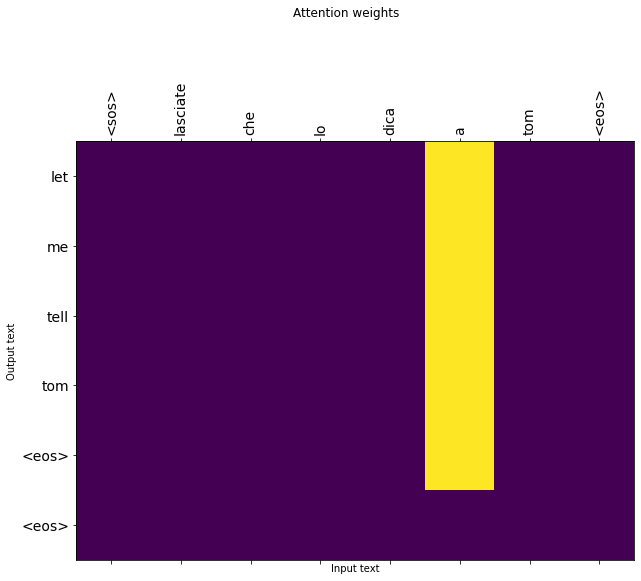

In [ ]:
plot_attention(attention_plot, xval['Italian'].values[150], pred_sent)

In [ ]:
xval.iloc[235]

Italian               tom in realtà non vive a boston
eng_inp    <sos> tom does not actually live in boston
eng_out    tom does not actually live in boston <eos>
Name: 298899, dtype: object

In [ ]:
print("Italian sentence:  ",xval['Italian'].values[235])
start = time.time()
pred_sent,attention_plot = predict(xval['Italian'].values[235])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")

Italian sentence:   tom in realtà non vive a boston
Translated sentence:    tom does not actually live in boston <eos>
Translation time: 0.1 seconds


<font color='blue'>**Calculate BLEU score**</font>

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
import nltk.translate.bleu_score as bleu

start = time.time()

import warnings
warnings.filterwarnings("ignore")

sample = xval.sample(1000)
predicted_sent=[]
b_score = []
for i,sent in enumerate(sample["Italian"].values):
    pred_sent,attention_plot = predict(sent)
    predicted_sent.append(pred_sent)
    bs = bleu.sentence_bleu([sample["eng_out"].values[i].split()],pred_sent.split())
    b_score.append(round(bs,3))
sample["machine_translation"] = predicted_sent
sample["BLEU_score"] = b_score
sample.drop("eng_inp",axis=1,inplace=True)

print("Average BLEU score of 1000 sample translations:",np.mean(b_score))
    
end = time.time()

print("Translation time for 1000 sentences:",round(end-start,2),"seconds")
    

Average BLEU score of 1000 sample translations: 0.40623699999999996
Translation time for 1000 sentences: 58.37 seconds


In [ ]:
sample.head(20)

,Italian,eng_out,machine_translation,BLEU_score
135819,io ho molti rimpianti,i have a lot of regrets <eos>,i have a lot of regrets <eos>,1.000
327756,io ho molte cose da fare stamattina,i have a lot of things to do this morning <eos>,i have many things to do this kind of doing t...,0.122
180206,voi avete molto denaro,do you have a lot of money <eos>,do you have a lot of money <eos>,1.000
312570,tom cominciò a lavorare a boston nel 2013,tom started working in boston in 2013 <eos>,tom started working in 2013 <eos>,0.507
80007,hanno bisogno del vostro aiuto,they need your help <eos>,they need your help <eos>,1.000
106310,mi è stato detto di entrare,i was told to come in <eos>,i was too <eos>,0.000
297181,se non ti dispiace andrò con tom,if you do not mind i will go with tom <eos>,if you do not go i will not go i will not go ...,0.122
304902,non succederà questa volta,that is not going to happen this time <eos>,it is not happen this is not happen this is n...,0.000
265414,state dicendo che è sbagliato,are you saying that that is wrong <eos>,are you saying that is wrong <eos>,0.689
21792,sono felici,they are happy <eos>,they are happy <eos>,1.000


<font color='blue'>**Repeat the same steps for Concat scoring function**</font>

In [ ]:
optimizer = tf.keras.optimizers.Adam()
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("concat_score_model.h5", monitor='val_loss', 
                             verbose=1, save_weights_only = True, save_best_only=True, mode='auto',save_freq='epoch')

%reload_ext tensorboard
import datetime
log_dir = "log3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks=[checkpoint,tensorboard_callback]

In [ ]:
#Compile and train your model on general scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
batch_size=64
inp_vocab_size=voc_size_ita+1
out_vocab_size=voc_size_eng+1
embedding_size=100
lstm_size=64
enc_input_length=max_len_ita
dec_input_length=max_len_eng
dec_units=64
score_fun='concat'
att_units=64
att_model_conc = encoder_decoder(batch_size,inp_vocab_size,embedding_size,lstm_size,enc_input_length,
                out_vocab_size, dec_input_length, dec_units ,score_fun ,att_units)
att_model_conc.compile(optimizer=optimizer,loss=loss_function)


In [ ]:
att_model_conc.fit(train_dataloader,epochs=20,callbacks=callbacks,validation_data=test_dataloader)

Epoch 1/20
4411/4411 [==============================] - 1818s 411ms/step - loss: 1.2861 - val_loss: 1.1802

Epoch 00001: val_loss improved from inf to 1.18024, saving model to concat_score_model.h5
Epoch 2/20
4411/4411 [==============================] - 2258s 512ms/step - loss: 0.8890 - val_loss: 0.9595

Epoch 00002: val_loss improved from 1.18024 to 0.95950, saving model to concat_score_model.h5
Epoch 3/20
4411/4411 [==============================] - 1784s 404ms/step - loss: 0.6895 - val_loss: 0.8704

Epoch 00003: val_loss improved from 0.95950 to 0.87037, saving model to concat_score_model.h5
Epoch 4/20
4411/4411 [==============================] - 1795s 407ms/step - loss: 0.5594 - val_loss: 0.8224

Epoch 00004: val_loss improved from 0.87037 to 0.82237, saving model to concat_score_model.h5
Epoch 5/20
4411/4411 [==============================] - 1795s 407ms/step - loss: 0.4705 - val_loss: 0.8317

Epoch 00005: val_loss did not improve from 0.82237
Epoch 6/20
4411/4411 [===============

In [ ]:
def predict_conc(input_sentence):
    #A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    inp = tok_ita.texts_to_sequences([input_sentence])
    inp = pad_sequences(inp, maxlen=max_len_ita, dtype='int32', padding='post')
    #print("input_shape",inp.shape)
    #B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    enc_out,enc_h_state,enc_c_state = att_model_conc.layers[0](inp,att_model.encoder.initialize_states(batch_size=1))
    #C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
    dec_inp = np.array(tok_eng.word_index['<sos>']).reshape(1,1)
    #print(enc_out.shape,enc_h_state.shape,enc_c_state.shape,dec_inp.shape)
    dec_stop = tok_eng.word_index['<eos>']
    states=[enc_h_state,enc_c_state]
    stop_condition=False
    sent=''
    k=0
    output_len = max_len_eng
    input_len = max_len_ita
    attention_weights_list = []
    #print("att_plot shape:",attention_plot.shape)
    
    for t in range(output_len):
        predictions,state_h,state_c,attention_weights,context_vector = att_model_conc.layers[1].OSD(dec_inp,
                                                                                                      enc_out,
                                                                                                      enc_h_state,enc_c_state)
        #print("OSD pred shape:",predictions.shape)
        attention_weights_list.append(attention_weights[0,:,0])
        
        word_ind = np.argmax(predictions,-1)
        
        pred_str = list(tok_eng.word_index.keys())[int(word_ind-1)]
        
        sent += ' '+pred_str
        k+=1
        if k>max_len_eng or int(word_ind) == int(dec_stop):
            return sent,np.array(attention_weights_list)
        
        dec_inp = word_ind.reshape(1,1)
        
    return sent, np.array(attention_weights_list)

In [ ]:
xval.iloc[150]

Italian    lasciate che lo dica a tom
eng_inp         <sos> let me tell tom
eng_out         let me tell tom <eos>
Name: 28961, dtype: object

In [ ]:
print("Italian sentence:  ",xval['Italian'].values[150])
start = time.time()
pred_sent,attention_plot = predict_conc(xval['Italian'].values[150])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")

Italian sentence:   lasciate che lo dica a tom
Translated sentence:    if tom <eos>
Translation time: 13.57 seconds


In [ ]:
xval.iloc[235]

Italian               tom in realtà non vive a boston
eng_inp    <sos> tom does not actually live in boston
eng_out    tom does not actually live in boston <eos>
Name: 298899, dtype: object

In [ ]:
print("Italian sentence:  ",xval['Italian'].values[235])
start = time.time()
pred_sent,attention_plot = predict_conc(xval['Italian'].values[235])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")

Italian sentence:   tom in realtà non vive a boston
Translated sentence:    he still get still get still get still get still get still get still get still get still get still get still get still
Translation time: 0.23 seconds


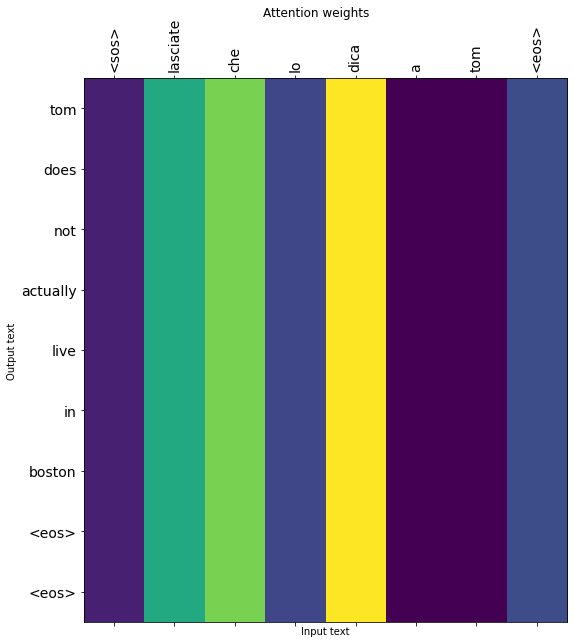

In [ ]:
plot_attention(attention_plot, xval['Italian'].values[150], pred_sent)

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
import nltk.translate.bleu_score as bleu

start = time.time()

import warnings
warnings.filterwarnings("ignore")

sample = xval.sample(1000)
predicted_sent=[]
b_score = []
for i,sent in enumerate(sample["Italian"].values):
    pred_sent,attention_plot = predict_conc(sent)
    predicted_sent.append(pred_sent)
    bs = bleu.sentence_bleu([sample["eng_out"].values[i].split()],pred_sent.split())
    b_score.append(round(bs,3))
sample["machine_translation"] = predicted_sent
sample["BLEU_score"] = b_score
sample.drop("eng_inp",axis=1,inplace=True)

print("Average BLEU score of 1000 sample translations:",np.mean(b_score))
    
end = time.time()

print("Translation time for 1000 sentences:",round(end-start,2),"seconds")
    

Average BLEU score of 1000 sample translations: 0.110006
Translation time for 1000 sentences: 69.75 seconds


<font color='blue'>**Repeat the same steps for General scoring function**</font>

In [ ]:
optimizer = tf.keras.optimizers.Adam()
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("gen_score_model.h5", monitor='val_loss', 
                             verbose=1, save_weights_only = True, save_best_only=True, mode='auto',save_freq='epoch')

%reload_ext tensorboard
import datetime
log_dir = "log3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks=[checkpoint,tensorboard_callback]

In [ ]:
#Compile and train your model on concat scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
#Compile and train your model on general scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
batch_size=1
inp_vocab_size=voc_size_ita+1
out_vocab_size=voc_size_eng+1
embedding_size=100
lstm_size=64
enc_input_length=max_len_ita
dec_input_length=max_len_eng
dec_units=64
score_fun='general'
att_units=64
att_model_gen = encoder_decoder(batch_size,inp_vocab_size,embedding_size,lstm_size,enc_input_length,
                out_vocab_size, dec_input_length, dec_units ,score_fun ,att_units)
att_model_gen.compile(optimizer=optimizer,loss=loss_function)


In [ ]:
att_model_gen.fit(train_dataloader,epochs=20,callbacks=callbacks,validation_data=test_dataloader)

Epoch 1/20
4411/4411 [==============================] - 1489s 337ms/step - loss: 1.2681 - val_loss: 1.0091

Epoch 00001: val_loss improved from inf to 1.00913, saving model to gen_score_model.h5
Epoch 2/20
4411/4411 [==============================] - 1483s 336ms/step - loss: 0.8837 - val_loss: 0.7867

Epoch 00002: val_loss improved from 1.00913 to 0.78667, saving model to gen_score_model.h5
Epoch 3/20
4411/4411 [==============================] - 1484s 336ms/step - loss: 0.7015 - val_loss: 0.6511

Epoch 00003: val_loss improved from 0.78667 to 0.65109, saving model to gen_score_model.h5
Epoch 4/20
4411/4411 [==============================] - 1498s 340ms/step - loss: 0.5784 - val_loss: 0.5641

Epoch 00004: val_loss improved from 0.65109 to 0.56412, saving model to gen_score_model.h5
Epoch 5/20
4411/4411 [==============================] - 1516s 344ms/step - loss: 0.4884 - val_loss: 0.4983

Epoch 00005: val_loss improved from 0.56412 to 0.49834, saving model to gen_score_model.h5
Epoch 6/2

In [ ]:
def predict_gen(input_sentence):
    #A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    inp = tok_ita.texts_to_sequences([input_sentence])
    inp = pad_sequences(inp, maxlen=max_len_ita, dtype='int32', padding='post')
    #print("input_shape",inp.shape)
    #B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    enc_out,enc_h_state,enc_c_state = att_model_gen.layers[0](inp,att_model_gen.encoder.initialize_states(batch_size=1))
    #C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
    dec_inp = np.array(tok_eng.word_index['<sos>']).reshape(1,1)
    #print(enc_out.shape,enc_h_state.shape,enc_c_state.shape,dec_inp.shape)
    dec_stop = tok_eng.word_index['<eos>']
    states=[enc_h_state,enc_c_state]
    stop_condition=False
    sent=''
    k=0
    output_len = max_len_eng
    input_len = max_len_ita
    attention_weights_list = []
    #print("att_plot shape:",attention_plot.shape)
    
    for t in range(output_len):
        predictions,state_h,state_c,attention_weights,context_vector = att_model_gen.layers[1].OSD(dec_inp,
                                                                                                      enc_out,
                                                                                                      enc_h_state,enc_c_state)
        #print("OSD pred shape:",predictions.shape)
        attention_weights_list.append(attention_weights[0,:,0])
        
        word_ind = np.argmax(predictions,-1)
        
        pred_str = list(tok_eng.word_index.keys())[int(word_ind-1)]
        
        sent += ' '+pred_str
        k+=1
        if k>max_len_eng or int(word_ind) == int(dec_stop):
            return sent,np.array(attention_weights_list)
        
        dec_inp = word_ind.reshape(1,1)
        
    return sent, np.array(attention_weights_list)

Italian            loro non torneranno
eng_inp    <sos> they will not be back
eng_out    they will not be back <eos>
Name: 65628, dtype: object
Italian sentence:   loro non torneranno
Translated sentence:    they will not be back <eos>
Translation time: 0.05 seconds


<ipython-input-50-7524cf7920bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
<ipython-input-50-7524cf7920bc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


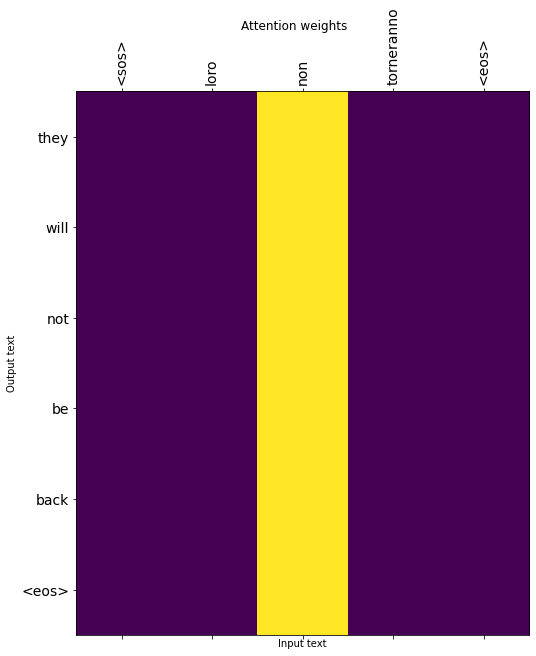

In [ ]:
print(xval.iloc[150])
print("="*100)
print("Italian sentence:  ",xval['Italian'].values[150])
start = time.time()
pred_sent,attention_plot = predict_gen(xval['Italian'].values[150])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")
print("="*100)
plot_attention(attention_plot, xval['Italian'].values[150], pred_sent)

Italian    adesso andate a casa
eng_inp    <sos> now go on home
eng_out    now go on home <eos>
Name: 21216, dtype: object
Italian sentence:   adesso andate a casa
Translated sentence:    now go home <eos>
Translation time: 0.05 seconds


<ipython-input-50-7524cf7920bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
<ipython-input-50-7524cf7920bc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


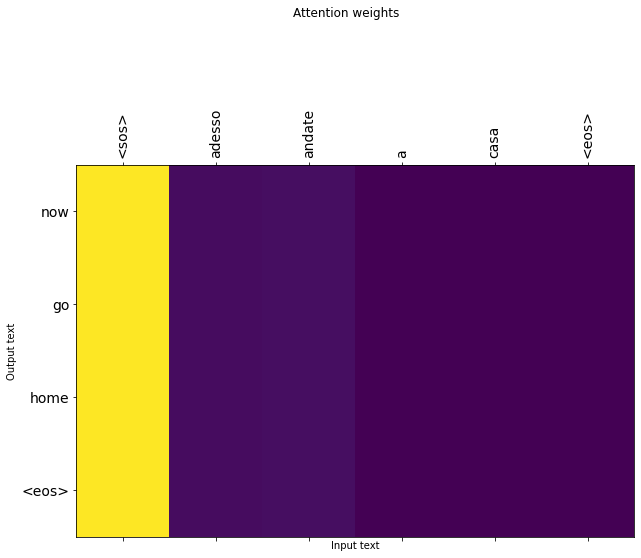

In [ ]:
print(xval.iloc[165])
print("="*100)
print("Italian sentence:  ",xval['Italian'].values[165])
start = time.time()
pred_sent,attention_plot = predict_gen(xval['Italian'].values[165])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")
print("="*100)
plot_attention(attention_plot, xval['Italian'].values[165], pred_sent)

Italian     hai chiesto il nostro aiuto
eng_inp    <sos> you asked for our help
eng_out    you asked for our help <eos>
Name: 130782, dtype: object
Italian sentence:   hai chiesto il nostro aiuto
Translated sentence:    did you ask our help <eos>
Translation time: 0.06 seconds


<ipython-input-50-7524cf7920bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
<ipython-input-50-7524cf7920bc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


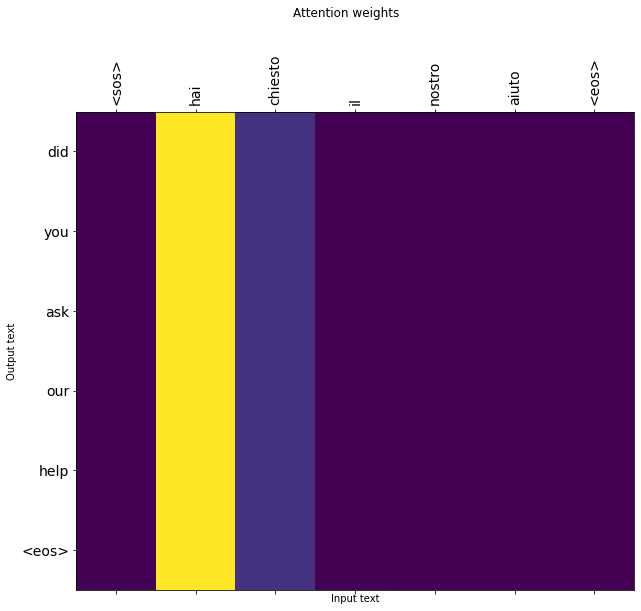

In [ ]:
print(xval.iloc[202])
print("="*100)
print("Italian sentence:  ",xval['Italian'].values[202])
start = time.time()
pred_sent,attention_plot = predict_gen(xval['Italian'].values[202])
end = time.time()
print("Translated sentence:  ",pred_sent)
print("Translation time:",round(end-start,2),"seconds")
print("="*100)
plot_attention(attention_plot, xval['Italian'].values[202], pred_sent)

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
import nltk.translate.bleu_score as bleu

start = time.time()

import warnings
warnings.filterwarnings("ignore")

sample = xval.sample(1000)
predicted_sent=[]
b_score = []
for i,sent in enumerate(sample["Italian"].values):
    pred_sent,attention_plot = predict_gen(sent)
    predicted_sent.append(pred_sent)
    bs = bleu.sentence_bleu([sample["eng_out"].values[i].split()],pred_sent.split())
    b_score.append(round(bs,3))
sample["machine_translation"] = predicted_sent
sample["BLEU_score"] = b_score
sample.drop("eng_inp",axis=1,inplace=True)

print("Average BLEU score of 1000 sample translations:",np.mean(b_score))
    
end = time.time()

print("Translation time for 1000 sentences:",round(end-start,2),"seconds")
    

Average BLEU score of 1000 sample translations: 0.413175
Translation time for 1000 sentences: 64.87 seconds


**OBSERVATIONS:**

Average BLEU score of random 1000 translations for various models achieved were as follows:

1. Attention encoder decoder model with dot scoring function:
   Average BLEU score of 1000 sample translations: 0.4062

2. Attention encoder decoder model with concat scoring function:
   Average BLEU score of 1000 sample translations: 0.1100
   
3. Attention encoder decoder model with general scoring function:
   Average BLEU score of 1000 sample translations: 0.4131
   
As we can observe attention encoder-decoder model with concat scoring function performs the worst with a average BLEU score of just 0.11 for 1000 translations, whereas those with dot scoring and general scoring perform well out of which the model with general scoring function has the highest BLEU score of 0.4131.

Validation loss for model  general scoring is also lowest at 0.3023 compared to 0.7146 val_loss of model with concat scoring and 0.3215 val_loss of model with dot scoring function.

Model with concat scoring is overfitting as training loss is good but validation loss is high.